In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets, model_selection
from sklearn import svm

data2 = pd.read_csv('ArASL_data.csv', sep = ',')
data2.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0  jeem     235     234     233     233     232     232     231     231   
1  jeem     220     220     220     220     220     220     220     221   
2  jeem     211     212     214     216     215     215     214     213   
3  jeem      29      29      29      28      28      28      28      28   
4  jeem     236     236     236     236     236     236     236     236   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     230  ...       160       158       156       154       153       152   
1     221  ...       126       121       116       113       110       108   
2     214  ...       187       184       179       177       178       182   
3      28  ...       163       163       179       192       198       201   
4     238  ...       158       158       158       163       167       170   

   pixel781  pixel782  pixel783  pixel784  
0       151       150       149       148  
1       105       104       102       101  
2       188       189       189       187  
3       203       163        45        20  
4       174       179       184       183  

[5 rows x 785 columns]

In [16]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [17]:
data = downsample(data2,'label')

In [18]:
ratio=0.8
k=5

In [19]:
X_train = []
Y_train = []
x_train, x_test_p, y_train, y_test_p=train_test_split(data.drop(['label'], axis=1), data[['label']], test_size=1-ratio)

x_test = x_test_p.to_numpy()
y_test = y_test_p.to_numpy().reshape(len(y_test_p))
x_train_f = x_train.to_numpy()
y_train_f = y_train.to_numpy().reshape(len(y_train))


for i in range(0,k-1):
    x_train_1, x_train_2, y_train_1, y_train_2=train_test_split(x_train, y_train, test_size=1/(k-i))
    X_train.append(x_train_2.to_numpy())
    Y_train.append(y_train_2.to_numpy().reshape(len(y_train_2)))
    x_train = x_train_1.copy()
    y_train = y_train_1.copy()
X_train.append(x_train_1.to_numpy())
Y_train.append(y_train_1.to_numpy().reshape(len(y_train_1)))
   
for i in range(len(X_train)):
    print(X_train[i].shape, Y_train[i].shape)
print(x_test.shape,y_test.shape)

(5141, 784) (5141,)
(5141, 784) (5141,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(6426, 784) (6426,)


In [20]:
def accuracy(y,y_hat):
  yb = (y == y_hat)
  return np.sum(yb)/np.size(y)

In [ ]:
gamma = [1e-8,1e-6,1e-4]
c = 1e15
Y_print=[]
Acc_mean=[]
for k in gamma:
    Acc = []
    print(k)
    for i in range(len(X_train)):
        x_val = X_train[i]
        y_val = Y_train[i]
        list_x = np.array(X_train)
        list_y = np.array(Y_train)
        list_x = np.delete(list_x,i)
        list_y = np.delete(list_y,i)
        x_train = list_x[0]
        y_train = list_y[0]
        for j in range(1,len(list_x)):
            x_train_2 = x_train.copy()
            y_train_2 = y_train.copy()
            x_train = np.concatenate((x_train_2,list_x[j]))
            y_train = np.concatenate((y_train_2,list_y[j]))
        print(x_train.shape,y_train.shape)
        svc=svm.SVC(kernel='rbf', gamma=k, C = c)
        svc.fit(x_train, y_train)
        y_hat_scikit = svc.predict(x_val)
        
        Acc.append(accuracy(y_val, y_hat_scikit))
    print(np.mean(Acc))
    Acc_mean.append(np.mean(Acc))
print(Acc_mean)

In [ ]:
gamma_t = 1e-6
c_values = [1, 1e4, 1e8, 1e12]
Y_print=[]
Acc_mean=[]
for k in c_values:
    Acc = []
    print(k)
    for i in range(len(X_train)):
        x_val = X_train[i]
        y_val = Y_train[i]
        list_x = np.array(X_train)
        list_y = np.array(Y_train)
        list_x = np.delete(list_x,i)
        list_y = np.delete(list_y,i)
        x_train = list_x[0]
        y_train = list_y[0]
        for j in range(1,len(list_x)):
            x_train_2 = x_train.copy()
            y_train_2 = y_train.copy()
            x_train = np.concatenate((x_train_2,list_x[j]))
            y_train = np.concatenate((y_train_2,list_y[j]))
        print(x_train.shape,y_train.shape)
        svc=svm.SVC(kernel='rbf', gamma=gamma_t, C = k)
        svc.fit(x_train, y_train)
        y_hat_scikit = svc.predict(x_val)
        
        Acc.append(accuracy(y_val, y_hat_scikit))
    print(np.mean(Acc))
    Acc_mean.append(np.mean(Acc))
print(Acc_mean)

In [35]:
svc=svm.SVC(kernel='rbf', degree=1)

In [36]:
svc.fit(x_train,y_train)

SVC(degree=1, kernel='poly')

In [37]:
y_pred=svc.predict(x_test)


In [17]:
def accuracy(y,y_hat):
  yb = (y == y_hat)
  return np.sum(yb)/np.size(y)

In [38]:
print(accuracy(y_test, y_pred))

0.6224712107065048


In [47]:
X_print = [2,4,6,8,10]
Acc_mean2 = Acc_mean[1:]
print(Acc_mean2)

[0.9376315906987165, 0.9660727863358354, 0.960003269663202, 0.9326901229680974, 0.8907868989439441]


In [51]:
k=5
Acc = []
for i in range(len(X_train)):
    x_val = X_train[i]
    y_val = Y_train[i]
    list_x = np.array(X_train)
    list_y = np.array(Y_train)
    list_x = np.delete(list_x,i)
    list_y = np.delete(list_y,i)
    x_train = list_x[0]
    y_train = list_y[0]
    for j in range(1,len(list_x)):
        x_train_2 = x_train.copy()
        y_train_2 = y_train.copy()
        x_train = np.concatenate((x_train_2,list_x[j]))
        y_train = np.concatenate((y_train_2,list_y[j]))
    print(x_train.shape,y_train.shape)
    svc=svm.SVC(kernel='poly', degree=k)
    svc.fit(x_train, y_train)
    y_hat_scikit = svc.predict(x_val)
    Acc.append(accuracy(y_val, y_hat_scikit))
print(np.mean(Acc))

<ipython-input-51-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-51-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-51-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-51-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-51-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-51-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-51-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-51-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-51-c7828736c122>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-51-c7828736c122>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
0.9644387116013251


In [55]:
k=3
Acc = []
for i in range(len(X_train)):
    x_val = X_train[i]
    y_val = Y_train[i]
    list_x = np.array(X_train)
    list_y = np.array(Y_train)
    list_x = np.delete(list_x,i)
    list_y = np.delete(list_y,i)
    x_train = list_x[0]
    y_train = list_y[0]
    for j in range(1,len(list_x)):
        x_train_2 = x_train.copy()
        y_train_2 = y_train.copy()
        x_train = np.concatenate((x_train_2,list_x[j]))
        y_train = np.concatenate((y_train_2,list_y[j]))
    print(x_train.shape,y_train.shape)
    svc=svm.SVC(kernel='poly', degree=k)
    svc.fit(x_train, y_train)
    y_hat_scikit = svc.predict(x_val)
    Acc.append(accuracy(y_val, y_hat_scikit))
print(np.mean(Acc))

<ipython-input-55-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-55-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-55-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-55-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-55-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-55-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-55-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-55-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-55-d80e65834098>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-55-d80e65834098>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
0.9667342346603979


In [7]:
c_values = [1, 1e4, 1e8, 1e12]
gamma_values = [1e-12,1e-10,1e-8,1e-6,1e-4]




acc_values = np.array([[ 0.02918066175863982, 0.02918066175863982,0.23266692501042585, 0.9655281906274196, 0.7645711405296703],
                      [ 0.22546905664918554, 0.8144109648760971, 0.9584468645670686,  0.9833867353094108, 0.773831099189623],
                      [0.8356158357660284, 0.9413275211033298, 0.9572796780592732, 0.9833867353094108, 0.773831099189623],
                      [0.8318416756418416,0.9411719093546427,0.9572796780592732,0.9833867353094108, 0.773831099189623]])
mean_acc = np.mean(acc_values)
print(mean_acc)


0.7377812133629318


In [8]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [14]:
from matplotlib.colors import Normalize

parameters = {'axes.labelsize': 20,
          'axes.titlesize': 35,'xtick.labelsize' : 15,'ytick.labelsize' : 15}
plt.rcParams.update(parameters)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    acc_values,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0, midpoint=mean_acc),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_values)), gamma_values, rotation=mean_acc)
plt.yticks(np.arange(len(c_values)), c_values)
##plt.title("Validation accuracy")
plt.show()

In [1]:
c_values = [1e-4,1,1e4,1e8]
gamma_value = [1e-8,1e-4,1,1e4]


In [18]:
print(np.logspace(-9, 3, 13))

[1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00
 1.e+01 1.e+02 1.e+03]


In [ ]:
print(1e15)

In [23]:
last_model = svc=svm.SVC(kernel='rbf', gamma=1e-6, C = 1e4)

In [24]:
last_model.fit(x_train_f, y_train_f)
y_hat_scikit = last_model.predict(x_test)
print(accuracy(y_test, y_hat_scikit))

0.9849050731403672


In [25]:
import seaborn as sns
cm = pd.crosstab(y_test, y_hat_scikit, 
                               rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

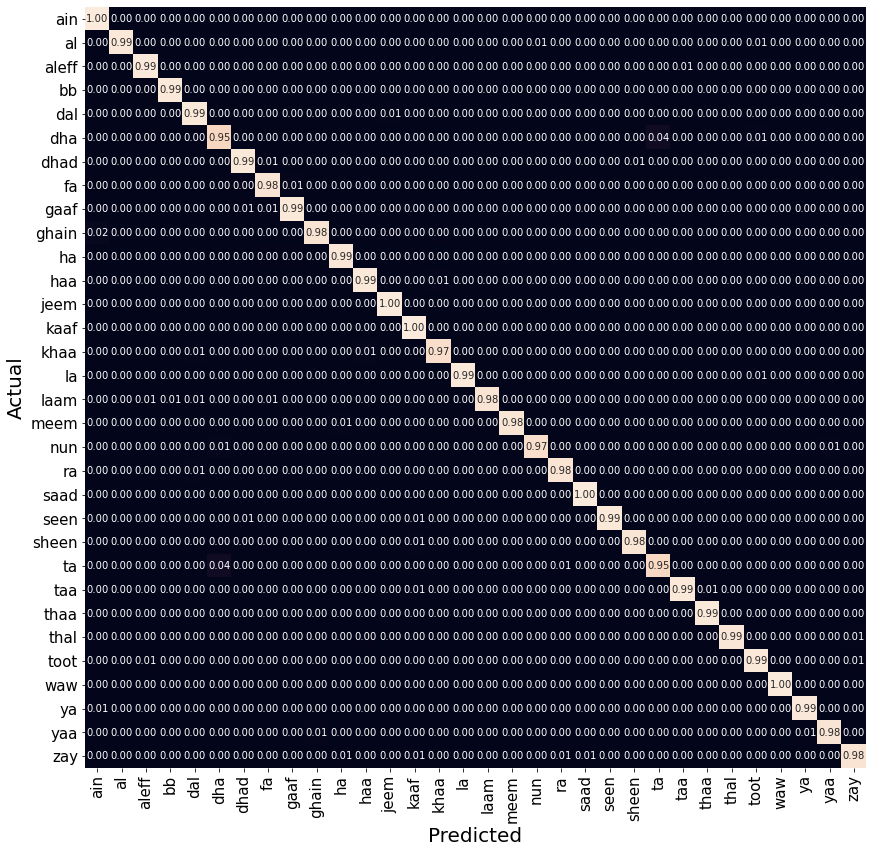

In [28]:
cm = pd.crosstab(y_test, y_hat_scikit, 
                               rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(14,14));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)